In [155]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from gwaxion import physics
import pandas as pd

In [209]:
# create an array of BH masses in LIGO's band
n_mass = 1000
n_alpha = 1000

mbhs_array = np.logspace(0, 3, n_mass).reshape(n_mass, 1)
distance = 5E6 * physics.PC_SI
chi_i = 0.9

In [210]:
alphas_array = np.linspace(0, 0.5, n_alpha).reshape(1, n_alpha)

h0s, fgws = physics.h0_scalar_brito(mbhs_array, alphas_array, chi_i=chi_i, d=distance)
mbhs = np.repeat(mbhs_array, n_alpha, axis=1)

df1 = pd.DataFrame({'h0': h0s.flatten(), 'fgw': fgws.flatten(), 'mbhs': mbhs.flatten()})
df1 = df1[df1['h0']>0]

df1['h0'].max()

7.1234623170201907e-24

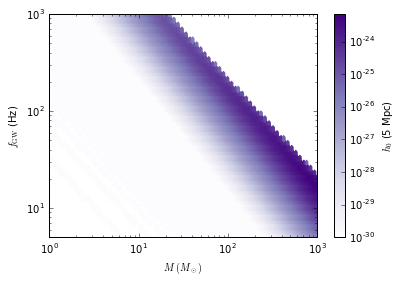

In [211]:
# plot
# norm = matplotlib.colors.LogNorm(vmin=df1['h0'].min(), vmax=df1['h0'].max())
norm = matplotlib.colors.LogNorm(vmin=1E-30, vmax=df1['h0'].max())

ax = plt.hexbin(df1['mbhs'], df1['fgw'], C=df1['h0'], xscale='log', yscale='log', cmap='Purples', norm=norm)
cb = plt.colorbar(ax, norm=norm, label=r'$h_0$ (5 Mpc)')
plt.ylabel(r'$f_{\rm GW}$ (Hz)')
plt.xlabel(r'$M$ $(M_\odot)$')
plt.ylim(5, 1e3)
plt.show()
plt.close()

In [204]:
fgws_ma = np.ma.masked_array(fgws, mask=fgws<=0)
h0s_ma = np.ma.masked_array(h0s, mask=h0s<=1E-30)

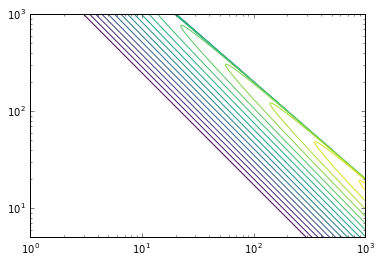

In [213]:
from matplotlib import ticker
cs = plt.contour(mbhs,fgws_ma, np.log10(h0s_ma), 20, cmap='viridis')#, locator=ticker.LogLocator(100))
#plt.clabel(cs, inline=1, fontsize=10)
plt.ylim(5, 1E3)
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.close()

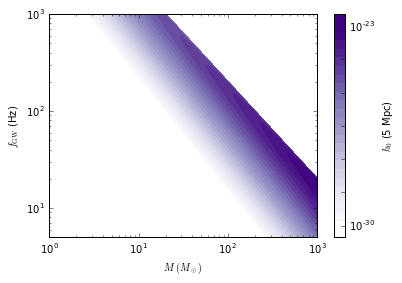

In [214]:
cm = plt.contourf(mbhs,fgws_ma, h0s_ma, locator=ticker.LogLocator(numticks=100,base=2), cmap='Purples', norm=norm)
#cs = plt.contour(mbhs,fgws_ma, h0s_ma, ticklocation=ticker.LogLocator(), colors='lavender', norm=norm)
# fmt = ticker.LogFormatterMathtext()
# fmt.create_dummy_axis()
# plt.clabel(cs, cs.levels, inline=True, fontsize=8, fmt=fmt, loc='best')
cb_ticks = np.logspace(-30, np.ceil(np.log10(h0s_ma[~np.isnan(h0s_ma)].max())), 7)
cb = plt.colorbar(cm, norm=norm, label=r'$h_0$ (5 Mpc)', ticks=cb_ticks)
plt.ylim(5, 1E3)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$f_{\rm GW}$ (Hz)')
plt.xlabel(r'$M$ $(M_\odot)$')
plt.show()
plt.close()

# Slower alternative

In [42]:
mbhs_array = np.logspace(0, 3, n_mass)
h0s, fgws, alphas, mbhs = [], [], [], []
for mbh in mbhs_array:
    bh = physics.BlackHole(mass=mbh, chi=chi_i, msun=True)
    h0s_loc, fgws_loc, alphas_loc = bh.scan_alphas(alpha_max=0.5, delta_alpha=0.0001)
    mbhs = np.concatenate([mbhs, [mbh]*len(h0s_loc)])
    h0s = np.concatenate([h0s, h0s_loc])
    fgws = np.concatenate([fgws, fgws_loc])
    alphas = np.concatenate([alphas, alphas_loc])

df2 = pd.DataFrame({'h0': h0s/distance, 'fgw': fgws, 'alpha': alphas, 'mbhs': mbhs})
df2 = df1[df1['h0']>0]

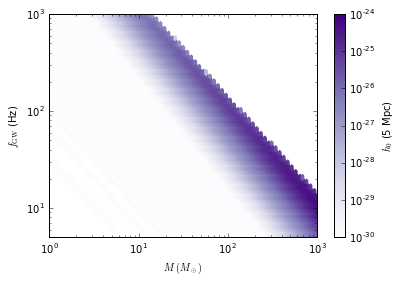

In [45]:
# plot
ax = plt.hexbin(df2['mbhs'], df2['fgw'], C=df2['h0'], xscale='log', yscale='log', cmap='Purples', norm=norm)
cb = plt.colorbar(ax, norm=norm, label=r'$h_0$ (5 Mpc)')
plt.ylabel(r'$f_{\rm GW}$ (Hz)')
plt.xlabel(r'$M$ $(M_\odot)$')
plt.ylim(5, 1e3)
plt.show()
plt.close()